In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [135]:
#Cross Validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Housingdata.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
pd.set_option("display.max_column",2000)

In [8]:
pd.set_option("display.max_row",2000)

In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  1460
No. of columns =  81


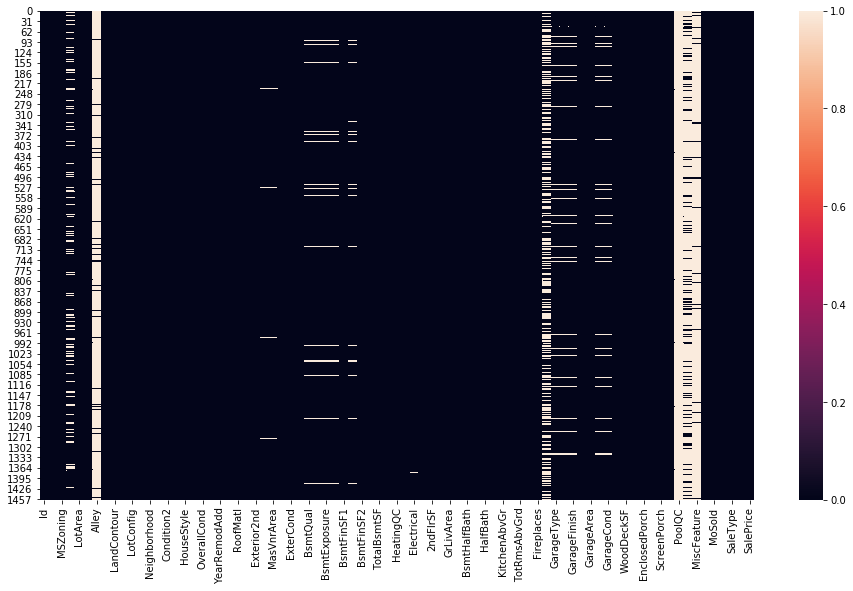

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [12]:
print("Number of empty rows = ", df.isnull().all(axis =1).sum())

Number of empty rows =  0


In [13]:
print("Number of empty columns = ", df.isnull().all(axis =0).sum())

Number of empty columns =  0


In [14]:
df.shape

(1460, 81)

In [15]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [17]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [18]:
df.isnull().sum(axis=0).sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [19]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False).head(15)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
dtype: float64

In [20]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False).head(15)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
dtype: float64

In [21]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [22]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [23]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [24]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [25]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
df['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [27]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [28]:
df1=df.select_dtypes(include='object')

In [29]:
df1.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
Heating           6
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
ExterCond         5
BldgType          5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
FireplaceQu       5
LotShape          4
LandContour       4
MiscFeature       4
Fence             4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
GarageFinish      3
PavedDrive        3
PoolQC            3
LandSlope         3
Utilities         2
CentralAir        2
Alley             2
Street            2
dtype: int64

In [30]:
df.select_dtypes(include=['int64','float64']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [31]:
df.select_dtypes(include=['int64','float64']).head().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
df.select_dtypes(include='float64').head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


# MISSING VALUES

In [33]:
df.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [35]:
df['LotFrontage'].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

In [36]:
df['LotFrontage'].mode()

0    60.0
dtype: float64

In [37]:
df['LotFrontage'].mean()

70.04995836802665

In [38]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [39]:
df = df.drop('Alley', axis=1)

In [40]:
df['MasVnrType'].mode()

0    None
dtype: object

In [41]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [42]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [43]:
df['MasVnrArea'].mode()

0    0.0
dtype: float64

In [44]:
df['MasVnrArea'].value_counts().head()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64

In [45]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [46]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [47]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [48]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [49]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [50]:
df['BsmtCond'].mode()

0    TA
dtype: object

In [51]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [52]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [53]:
df['BsmtExposure'].mode()

0    No
dtype: object

In [54]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [55]:
df['BsmtFinType1'].value_counts().head()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
Name: BsmtFinType1, dtype: int64

In [56]:
df['BsmtFinType1'].mode()

0    Unf
dtype: object

In [57]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [58]:
df['BsmtFinType2'].value_counts().head()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
Name: BsmtFinType2, dtype: int64

In [59]:
df['BsmtFinType2'].value_counts().head()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
Name: BsmtFinType2, dtype: int64

In [60]:
df['BsmtFinType2'].mode()

0    Unf
dtype: object

In [61]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [62]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [64]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [65]:
# Removing columns having more than 30% missing values

df = df.drop('FireplaceQu', axis=1)
df = df.drop('PoolQC', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('MiscFeature', axis=1)

In [66]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [67]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [68]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [69]:
df['GarageYrBlt'].value_counts().head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

In [70]:
df['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [71]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [72]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [73]:
df['GarageFinish'].mode()

0    Unf
dtype: object

In [74]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [75]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [76]:
df['GarageQual'].mode()

0    TA
dtype: object

In [77]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [78]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [79]:
df['GarageCond'].mode()

0    TA
dtype: object

In [80]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [81]:
df = df.drop('Id', axis=1)

In [82]:
round(100*(df.isnull().sum()/len(df.index)), 2).head()

MSSubClass     0.0
MSZoning       0.0
LotFrontage    0.0
LotArea        0.0
Street         0.0
dtype: float64

In [83]:
df.shape

(1460, 75)

# HANDELED ALL THE MISSING VALUE

CONVERTING COLUMNS WHICH HAVE CATEGORICAL NATURE

In [84]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

CONVERT IN MONTH ABBRIVATION

In [503]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [504]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [85]:
from pandas.api.types import CategoricalDtype

In [86]:
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [87]:
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['TA', 'Gd', 'Fa', 'Po'],ordered = True)).cat.codes

In [88]:
df['BsmtCond'].unique()

array([0, 1, 2, 3], dtype=int8)

In [89]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [90]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['No', 'Gd', 'Mn', 'Av'],ordered = True)).cat.codes

In [91]:
df['BsmtExposure'].unique()

array([0, 1, 2, 3], dtype=int8)

In [92]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [93]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'],ordered = True)).cat.codes

In [94]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [95]:
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'],ordered = True)).cat.codes

In [96]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [97]:
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Gd', 'TA', 'Ex', 'Fa'],ordered = True)).cat.codes

In [98]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [99]:
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['TA', 'Gd', 'Fa', 'Po', 'Ex'],ordered = True)).cat.codes

In [100]:
df['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [101]:
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],ordered = True)).cat.codes

In [102]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [103]:
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['TA', 'Fa', 'Gd', 'Po', 'Ex'],ordered = True)).cat.codes

In [104]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [105]:
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['TA', 'Fa', 'Gd', 'Ex', 'Po'],ordered = True)).cat.codes

In [106]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [107]:
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['RFn', 'Unf', 'Fin'],ordered = True)).cat.codes

In [108]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [109]:
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Ex', 'Gd', 'TA', 'Fa', 'Po'],ordered = True)).cat.codes

In [110]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [111]:
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Gd', 'TA', 'Ex', 'Fa'],ordered = True)).cat.codes

In [112]:
df['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [113]:
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['Y', 'N', 'P'],ordered = True)).cat.codes

In [114]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [115]:
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['AllPub', 'NoSeWa'],ordered = True)).cat.codes

In [116]:
df['Utilities'].unique()

array([0, 1], dtype=int8)

In [117]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [118]:
df['MSZoning'] = df['MSZoning'].astype(CategoricalDtype(categories=['RL', 'RM', 'C (all)', 'FV', 'RH'],ordered = True)).cat.codes

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [120]:
df.select_dtypes(include='object').columns

Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtQual', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

# CONVERT CATEGORICAL FEATURE INTO NUMERIC

In [121]:
df.shape

(1460, 75)

In [122]:
df_final = pd.get_dummies(df,columns=['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtQual', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'MoSold', 'SaleType', 'SaleCondition'])

In [123]:
df_final.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,65.0,8450,0,7,5,2003,2003,196.0,0,0,0,0,0,706,0,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2008,208500,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0

In [124]:
df_final.shape

(1460, 229)

In [125]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 229 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), int8(15), uint8(178)
memory usage: 685.9 KB


# DISTRIBUTION OF DATA

In [141]:
# Train - Test split
#just drop the outcome columns
#specify  input and output attributes
#X is the input and y is the output
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

# CROSS VALIDATION

In [129]:
df_final.shape

(1460, 229)

In [136]:
import sklearn.linear_model as linear_model

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [162]:
max_r_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = r_state, test_size=0.20)
    rfg = RandomForestRegressor(random_state=42)
    rfg.fit(X_train,y_train)
    y_pred = rfg.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:  ",r_state, " is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()        
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
#The below output shows that we are getting acceptable level of r2 score in most of the cases and max value is

r2_score corresponding to random state:   42  is  0.8882376819444355
r2_score corresponding to random state:   43  is  0.8397161539254142
r2_score corresponding to random state:   44  is  0.8518123886227775
r2_score corresponding to random state:   45  is  0.8758816791999438
r2_score corresponding to random state:   46  is  0.8847054963592411
r2_score corresponding to random state:   47  is  0.7118221991214567
r2_score corresponding to random state:   48  is  0.8231003382098016
r2_score corresponding to random state:   49  is  0.8936474652603608
r2_score corresponding to random state:   50  is  0.8930813951677029
r2_score corresponding to random state:   51  is  0.8196437494169301
r2_score corresponding to random state:   52  is  0.8809842915725551
r2_score corresponding to random state:   53  is  0.8330210649503041
r2_score corresponding to random state:   54  is  0.8157105995880336
r2_score corresponding to random state:   55  is  0.8459758553908043
r2_score corresponding to random s

# MAX R2 SCORE IS 0.909 AT RANDOM STATE 85

In [163]:
#Lets use cross val score function to check above is overfittingfrom sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(RandomForestRegressor(),X,y,cv=10,scoring="r2")
a_score
#By cross validatin we come to know that our model is performing ok or if we want to perform it more well than we need more data


array([0.86656793, 0.88299599, 0.92418003, 0.78522544, 0.88477707,
       0.8940224 , 0.88070294, 0.88297502, 0.79486925, 0.85920546])

# FINAL MODEL

In [ ]:
#Lets make our final model
x_train,y_train,y_train,y_test = train_test_split(x, y, random_state = 0, test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [571]:
#Importing libraries and classes
#Dividing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [572]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1022, 228) (438, 228) (1022,) (438,)


# RANDOM FOREST CLASSIFIER

In [167]:
rfg = RandomForestRegressor(random_state=85)

In [168]:
#Training the model
rfg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=85, verbose=0, warm_start=False)

In [169]:
y_predict = rfg.predict(X_test)

In [170]:
#Lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_predict)))
print("r2 score is : ",r2_score(y_test,y_predict))

RMSE is : 27531.06604002789
r2 score is :  0.8821046871309735
